In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load file
file_path = '/content/drive/MyDrive/UAS Machine Learning /AirQualityJakartaData.xlsx'
data = pd.read_excel(file_path)

# Tampilkan info awal dataset
print("\n Initial Dataset Info ")
print(data.info())

# Tampilkan dataset awal dalam bentuk tabel rapi dengan tabulate
print("\n Initial Dataset Preview ")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

# Preprocessing
print("\n Preprocessing Data ")
data = data[["PM10", "PM25", "SO2", "CO", "O3", "NO2", "category"]]  # Pilih kolom penting

# Bersihkan data non-numeric
for col in ["PM10", "PM25", "SO2", "CO", "O3", "NO2"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()  # Hapus baris dengan nilai kosong

# Simpan data yang sudah diproses
output_path = '/content/drive/MyDrive/UAS Machine Learning /PreprocessedAirQualityJakartaData.xlsx'
data.to_excel(output_path, index=False)

Mounted at /content/drive

 Initial Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   _id                           1825 non-null   int64         
 1   data_period                   1825 non-null   int64         
 2   date                          1825 non-null   datetime64[ns]
 3   station                       1825 non-null   object        
 4   PM10                          1825 non-null   object        
 5   PM25                          1825 non-null   object        
 6   SO2                           1825 non-null   object        
 7   CO                            1825 non-null   object        
 8   O3                            1825 non-null   object        
 9   NO2                           1825 non-null   object        
 10  max                           1822 non-null   

In [3]:
file_path = '/content/drive/MyDrive/UAS Machine Learning /PreprocessedAirQualityJakartaData.xlsx'
data = pd.read_excel(file_path)

# Info dataset setelah preprocessing
print("\n Dataset Info After Preprocessing ")
print(data.info())




 Dataset Info After Preprocessing 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PM10      1284 non-null   int64 
 1   PM25      1284 non-null   int64 
 2   SO2       1284 non-null   int64 
 3   CO        1284 non-null   int64 
 4   O3        1284 non-null   int64 
 5   NO2       1284 non-null   int64 
 6   category  1284 non-null   object
dtypes: int64(6), object(1)
memory usage: 70.3+ KB
None


***Preprocessed Dataset Preview***

In [4]:
# Tampilkan dataset setelah preprocessing dalam bentuk tabel rapi
print("\n Preprocessed Dataset Preview ")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))  # Tabel rapi menggunakan fancy_grid





 Preprocessed Dataset Preview 
╒════╤════════╤════════╤═══════╤══════╤══════╤═══════╤════════════╕
│    │   PM10 │   PM25 │   SO2 │   CO │   O3 │   NO2 │ category   │
╞════╪════════╪════════╪═══════╪══════╪══════╪═══════╪════════════╡
│  0 │     38 │     44 │    50 │    8 │   19 │    27 │ GOOD       │
├────┼────────┼────────┼───────┼──────┼──────┼───────┼────────────┤
│  1 │     29 │     33 │    47 │   11 │   21 │    27 │ GOOD       │
├────┼────────┼────────┼───────┼──────┼──────┼───────┼────────────┤
│  2 │     38 │     46 │    49 │    9 │   16 │    25 │ GOOD       │
├────┼────────┼────────┼───────┼──────┼──────┼───────┼────────────┤
│  3 │     33 │     41 │    47 │   11 │   21 │    22 │ GOOD       │
├────┼────────┼────────┼───────┼──────┼──────┼───────┼────────────┤
│  4 │     31 │     44 │    46 │    9 │   20 │    19 │ GOOD       │
╘════╧════════╧════════╧═══════╧══════╧══════╧═══════╧════════════╛


***Distribusi kategori***

In [5]:
# Distribusi kategori
print("\n Data Distribution by Category ")
category_counts = data["category"].value_counts()
print(tabulate(category_counts.reset_index(), headers=['Category', 'Count'], tablefmt='fancy_grid'))  # Tabel rapi




 Data Distribution by Category 
╒════╤════════════════╤═════════╕
│    │ Category       │   Count │
╞════╪════════════════╪═════════╡
│  0 │ MEDIUM         │    1079 │
├────┼────────────────┼─────────┤
│  1 │ GOOD           │     102 │
├────┼────────────────┼─────────┤
│  2 │ UNHEALTHY      │     101 │
├────┼────────────────┼─────────┤
│  3 │ VERY_UNHEALTHY │       2 │
╘════╧════════════════╧═════════╛


***Hapus Kategori Dengan Sample Paling Sedikit***

In [6]:
# Find the category with the fewest data points
min_category = category_counts.idxmin()
min_category_count = category_counts.min()

print(f"\nCategory with fewest data points: {min_category} ({min_category_count} data points)")

# Remove rows with the category that has the fewest data points
data = data[data["category"] != min_category]

# Display the updated category distribution
print("\nUpdated Data Distribution by Category")
updated_category_counts = data["category"].value_counts()
print(tabulate(updated_category_counts.reset_index(), headers=['Category', 'Count'], tablefmt='fancy_grid'))

# Save the updated dataset
output_path = '/content/drive/MyDrive/UAS Machine Learning /UpdatedPreprocessedAirQualityJakartaData.xlsx'
data.to_excel(output_path, index=False)

print(f"\nUpdated dataset saved to {output_path}")


Category with fewest data points: VERY_UNHEALTHY (2 data points)

Updated Data Distribution by Category
╒════╤════════════╤═════════╕
│    │ Category   │   Count │
╞════╪════════════╪═════════╡
│  0 │ MEDIUM     │    1079 │
├────┼────────────┼─────────┤
│  1 │ GOOD       │     102 │
├────┼────────────┼─────────┤
│  2 │ UNHEALTHY  │     101 │
╘════╧════════════╧═════════╛

Updated dataset saved to /content/drive/MyDrive/UAS Machine Learning /UpdatedPreprocessedAirQualityJakartaData.xlsx


***Visualisasi Distribusi Kategori***

<ipython-input-8-0b14d20a9a56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data, palette="viridis")


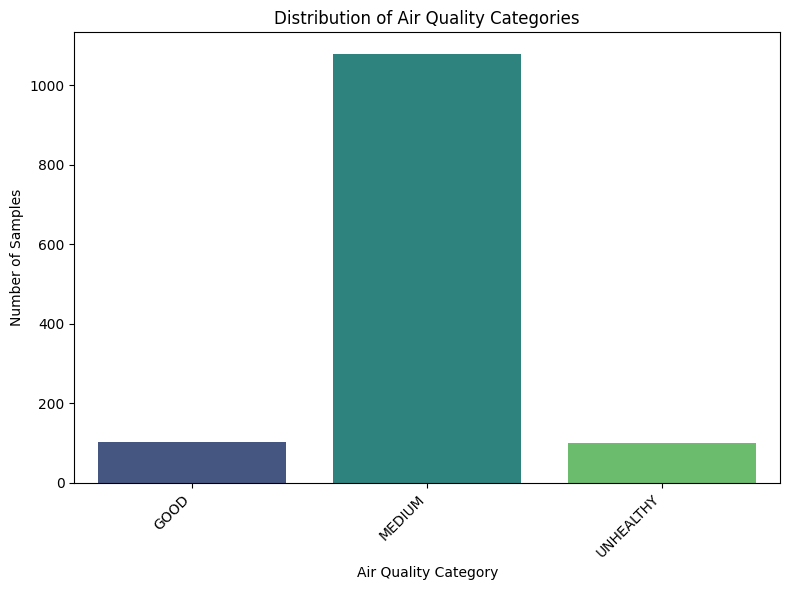

In [8]:
# Visualisasi distribusi kategori
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data, palette="viridis")
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Air Quality Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

***Feature-Engineered***

In [9]:
# Load the updated preprocessed dataset
file_path = "/content/drive/MyDrive/UAS Machine Learning /UpdatedPreprocessedAirQualityJakartaData.xlsx"
data = pd.read_excel(file_path)

# Feature Engineering (without 'station' column)
X = data[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]]
y = data["category"]

# Normalize numerical features
print("\nNormalizing Numerical Features")
scaler = MinMaxScaler()
X[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]] = scaler.fit_transform(X[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]])

# Display the feature-engineered dataset
print("\nFeature-Engineered Dataset (First 5 Rows)")
print(tabulate(X.head(), headers='keys', tablefmt='fancy_grid'))


Normalizing Numerical Features

Feature-Engineered Dataset (First 5 Rows)
╒════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╕
│    │     PM10 │      PM25 │      SO2 │       CO │       O3 │      NO2 │
╞════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╡
│  0 │ 0.277778 │ 0.153005  │ 0.5      │ 0.12963  │ 0.194805 │ 0.509434 │
├────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┤
│  1 │ 0.206349 │ 0.0928962 │ 0.461538 │ 0.185185 │ 0.220779 │ 0.509434 │
├────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┤
│  2 │ 0.277778 │ 0.163934  │ 0.487179 │ 0.148148 │ 0.155844 │ 0.471698 │
├────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┤
│  3 │ 0.238095 │ 0.136612  │ 0.461538 │ 0.185185 │ 0.220779 │ 0.415094 │
├────┼──────────┼───────────┼──────────┼──────────┼──────────┼──────────┤
│  4 │ 0.222222 │ 0.153005  │ 0.448718 │ 0.148148 │ 0.207792 │ 0.358491 │
╘════╧══════════╧═══════════╧════════

<ipython-input-9-996f791ecd61>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]] = scaler.fit_transform(X[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]])


***Correlation Matrix***


 Correlation Matrix 


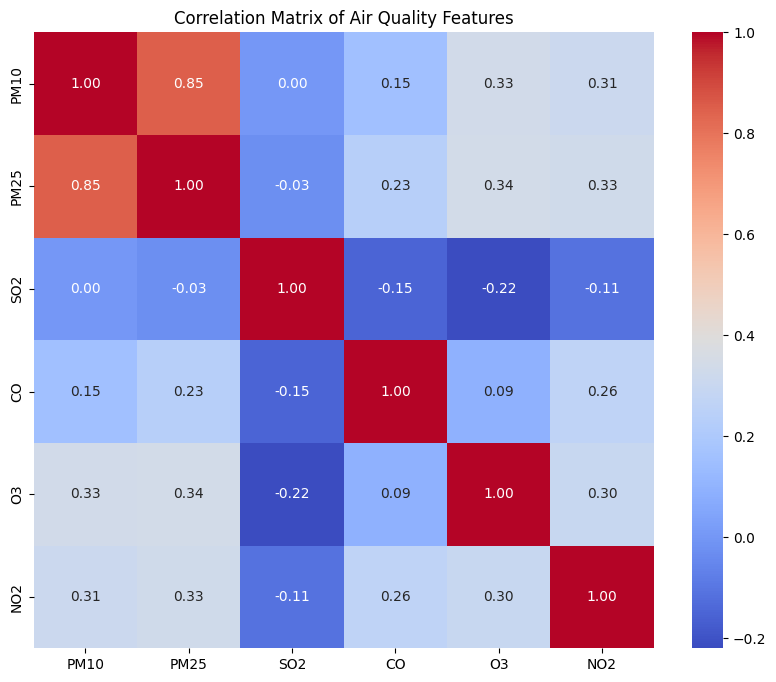

In [10]:
# Correlation Matrix
print("\n Correlation Matrix ")
correlation_matrix = data[["PM10", "PM25", "SO2", "CO", "O3", "NO2"]].corr()

# Plot Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Features')
plt.show()



***70% train, 30% test***

In [11]:
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi kategori menjadi angka

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Model 3: Linear Regression (hanya jika target y numerik)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Function to get evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    return accuracy, precision, recall, f1

# Evaluasi untuk Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf)
print(f"Model: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("----------------------------------------")

# Evaluasi untuk XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = get_metrics(y_test, y_pred_xgb)
print(f"Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("----------------------------------------")

# Evaluasi untuk Linear Regression (menggunakan threshold 0.5 untuk klasifikasi)
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
accuracy_lr, precision_lr, recall_lr, f1_lr = get_metrics(y_test, y_pred_lr_class)
print(f"Model: Linear Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("----------------------------------------")

# Classification report untuk Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Classification report untuk XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Classification report untuk Linear Regression
print("\nClassification Report for Linear Regression:")
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
print(classification_report(y_test, y_pred_lr_class))

Model: Random Forest
Accuracy: 0.9948
Precision: 0.9948
Recall: 0.9948
F1-Score: 0.9948
----------------------------------------
Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
----------------------------------------
Model: Linear Regression
Accuracy: 0.8883
Precision: 0.8299
Recall: 0.8883
F1-Score: 0.8558
----------------------------------------

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      1.00      1.00       329
           2       1.00      1.00      1.00        24

    accuracy                           0.99       385
   macro avg       0.99      0.99      0.99       385
weighted avg       0.99      0.99      0.99       385


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***80% train, 20% test***

In [12]:
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi kategori menjadi angka

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Model 3: Linear Regression (hanya jika target y numerik)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Function to get evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    return accuracy, precision, recall, f1

# Evaluasi untuk Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf)
print(f"Model: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("----------------------------------------")

# Evaluasi untuk XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = get_metrics(y_test, y_pred_xgb)
print(f"Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("----------------------------------------")

# Evaluasi untuk Linear Regression (menggunakan threshold 0.5 untuk klasifikasi)
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
accuracy_lr, precision_lr, recall_lr, f1_lr = get_metrics(y_test, y_pred_lr_class)
print(f"Model: Linear Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("----------------------------------------")

# Classification report untuk Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Classification report untuk XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Classification report untuk Linear Regression
print("\nClassification Report for Linear Regression:")
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
print(classification_report(y_test, y_pred_lr_class))

Model: Random Forest
Accuracy: 0.9922
Precision: 0.9922
Recall: 0.9922
F1-Score: 0.9922
----------------------------------------
Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
----------------------------------------
Model: Linear Regression
Accuracy: 0.8949
Precision: 0.8370
Recall: 0.8949
F1-Score: 0.8642
----------------------------------------

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00        16

    accuracy                           0.99       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.99      0.99      0.99       257


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***90% train, 10% test***

In [13]:
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi kategori menjadi angka

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Model 3: Linear Regression (hanya jika target y numerik)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Function to get evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    return accuracy, precision, recall, f1

# Evaluasi untuk Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf)
print(f"Model: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("----------------------------------------")

# Evaluasi untuk XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = get_metrics(y_test, y_pred_xgb)
print(f"Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("----------------------------------------")

# Evaluasi untuk Linear Regression (menggunakan threshold 0.5 untuk klasifikasi)
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
accuracy_lr, precision_lr, recall_lr, f1_lr = get_metrics(y_test, y_pred_lr_class)
print(f"Model: Linear Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("----------------------------------------")

# Classification report untuk Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Classification report untuk XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Classification report untuk Linear Regression
print("\nClassification Report for Linear Regression:")
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
print(classification_report(y_test, y_pred_lr_class))

Model: Random Forest
Accuracy: 0.9845
Precision: 0.9845
Recall: 0.9845
F1-Score: 0.9845
----------------------------------------
Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
----------------------------------------
Model: Linear Regression
Accuracy: 0.8682
Precision: 0.8043
Recall: 0.8682
F1-Score: 0.8333
----------------------------------------

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.99      0.99      0.99       112
           2       1.00      1.00      1.00         8

    accuracy                           0.98       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.98      0.98      0.98       129


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***SAVE MODEL 80% TRAIN, 20% TEST***

In [28]:
# Menggunakan LabelEncoder untuk mengonversi kategori menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi kategori menjadi angka

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalisasi data training
X_test_scaled = scaler.transform(X_test)       # Normalisasi data testing

# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Model 2: XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Model 3: Linear Regression (hanya jika target y numerik)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Function to get evaluation metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Atur zero_division ke 0
    return accuracy, precision, recall, f1

# Evaluasi untuk Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf)
print(f"Model: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("----------------------------------------")

# Evaluasi untuk XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = get_metrics(y_test, y_pred_xgb)
print(f"Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("----------------------------------------")

# Evaluasi untuk Linear Regression (menggunakan threshold 0.5 untuk klasifikasi)
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)  # Menetapkan threshold untuk klasifikasi
accuracy_lr, precision_lr, recall_lr, f1_lr = get_metrics(y_test, y_pred_lr_class)
print(f"Model: Linear Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print("----------------------------------------")

# Classification report untuk Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Classification report untuk XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Classification report untuk Linear Regression
print("\nClassification Report for Linear Regression:")
print(classification_report(y_test, y_pred_lr_class))

# Menyimpan model, scaler, dan LabelEncoder ke Google Drive
output_path = '/content/drive/MyDrive/UAS Machine Learning /'

joblib.dump(rf_model, output_path + 'random_forest_model.pkl')
print("Random Forest model saved to Google Drive.")

joblib.dump(xgb_model, output_path + 'xgboost_model.pkl')
print("XGBoost model saved to Google Drive.")

joblib.dump(lr_model, output_path + 'linear_regression_model.pkl')
print("Linear Regression model saved to Google Drive.")

# Simpan scaler
joblib.dump(scaler, output_path + 'scaler.pkl')
print("Scaler saved to Google Drive.")

# Simpan LabelEncoder
joblib.dump(label_encoder, output_path + 'label_encoder.pkl')
print("LabelEncoder saved to Google Drive.")

Model: Random Forest
Accuracy: 0.9922
Precision: 0.9922
Recall: 0.9922
F1-Score: 0.9922
----------------------------------------
Model: XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
----------------------------------------
Model: Linear Regression
Accuracy: 0.8949
Precision: 0.8370
Recall: 0.8949
F1-Score: 0.8642
----------------------------------------

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00        16

    accuracy                           0.99       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.99      0.99      0.99       257


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dari hasil nilai accuracy, precision, recall, dan F1-score milik 80% train dan 20% test, ditemukan model XGboost adalah model terbaik dengan accuracy 1.00 atau 100% dan nilai precision, recall, F1-score yang sempurna.

Disusul oleh model Random Forest dengan accuracy 0.99 atau 99%, dengan nilai precision, recall, F1-score 0.95 pada kelas 0.

Model dengan accuracy terburuk yaitu Linear Regression, dengan accuracy 0.90 atau 90%, walaupun memiliki performa yang baik untuk kelas mayoritas, namun memiliki performa yang buruk untuk mengenali kelas minoritas.

***FEATURE*** ***IMPORTANCE***

  Feature  Importance
1    PM25    0.664279
2     SO2    0.235692
0    PM10    0.091739
3      CO    0.006063
4      O3    0.001350
5     NO2    0.000877


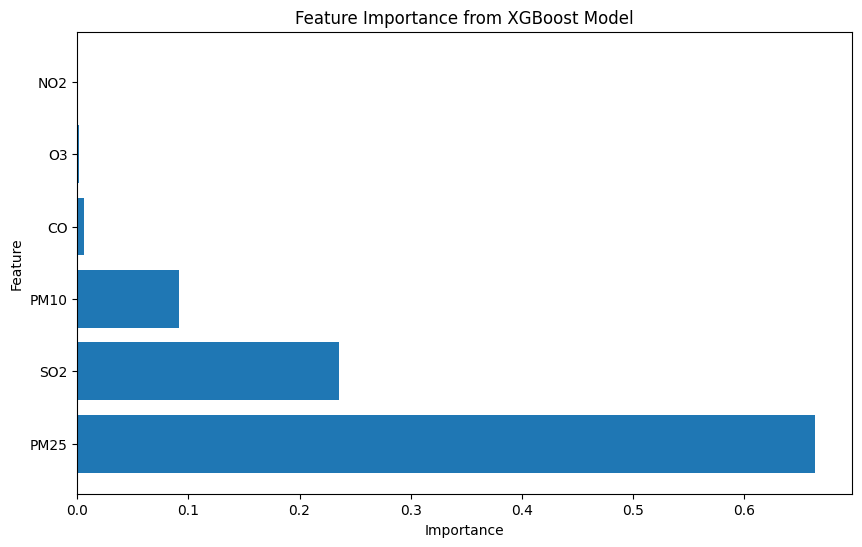

In [29]:
# Load the saved XGBoost model
loaded_rf_model = joblib.load('/content/drive/MyDrive/UAS Machine Learning /xgboost_model.pkl')

# Assuming 'X' is your feature matrix (as defined in your previous code)
# Get feature importances from the loaded model
feature_importances = loaded_rf_model.feature_importances_

# Get feature names (assuming you have them stored as a list or in the original DataFrame)
feature_names = list(X.columns)

# Create a DataFrame to store feature importances and names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Model')
plt.show()

In [39]:
import numpy as np

# Load saved XGBoost model
loaded_xgb_model = joblib.load('/content/drive/MyDrive/UAS Machine Learning /xgboost_model.pkl')

# Load saved scaler (pastikan Anda menyimpan scaler saat pelatihan)
scaler = joblib.load('/content/drive/MyDrive/UAS Machine Learning /scaler.pkl')

# Load saved LabelEncoder (pastikan Anda menyimpan LabelEncoder saat pelatihan)
label_encoder = joblib.load('/content/drive/MyDrive/UAS Machine Learning /label_encoder.pkl')

# Input data for prediction
pm25 = float(input("Masukkan nilai PM10: "))
so2 = float(input("Masukkan nilai PM2.5: "))
pm10 = float(input("Masukkan nilai SO2: "))
co = float(input("Masukkan nilai CO: "))
o3 = float(input("Masukkan nilai O3: "))
no2 = float(input("Masukkan nilai NO2: "))

# Create a DataFrame for the input data
input_data = pd.DataFrame({
    'PM10': [pm10],
    'PM25': [pm25],
    'SO2': [so2],
    'CO': [co],
    'O3': [o3],
    'NO2': [no2]
})

# Apply the same scaling used during training
input_data_scaled = scaler.transform(input_data)

# Make prediction using the loaded model
prediction = loaded_xgb_model.predict(input_data_scaled)

# Convert prediction back to category using LabelEncoder
predicted_category = label_encoder.inverse_transform(prediction)

# Print predicted category
print(f"Kategori kualitas udara yang diprediksi: {predicted_category[0]}")

Masukkan nilai PM10: 200
Masukkan nilai PM2.5: 150
Masukkan nilai SO2: 120
Masukkan nilai CO: 20
Masukkan nilai O3: 180
Masukkan nilai NO2: 150
Kategori kualitas udara yang diprediksi: UNHEALTHY
